# GARCH Stock Forecasting

Code Modified from:
https://github.com/ritvikmath/Time-Series-Analysis/blob/master/GARCH%20Stock%20Modeling.ipynb

## Read Data

In [19]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import yfinance as yf


## DIS Volatility

In [20]:
tickerSymbol = 'DIS'
data = yf.Ticker(tickerSymbol)
dis = data.history(start='2015-01-01', end='2021-01-01')


In [21]:
returns = 100 * dis.Close.pct_change().dropna()
returns.head()

Date
2015-01-05 00:00:00-05:00   -1.461327
2015-01-06 00:00:00-05:00   -0.530423
2015-01-07 00:00:00-05:00    1.022961
2015-01-08 00:00:00-05:00    1.034153
2015-01-09 00:00:00-05:00    0.490453
Name: Close, dtype: float64

Text(0.5, 1.0, 'DIS Returns')

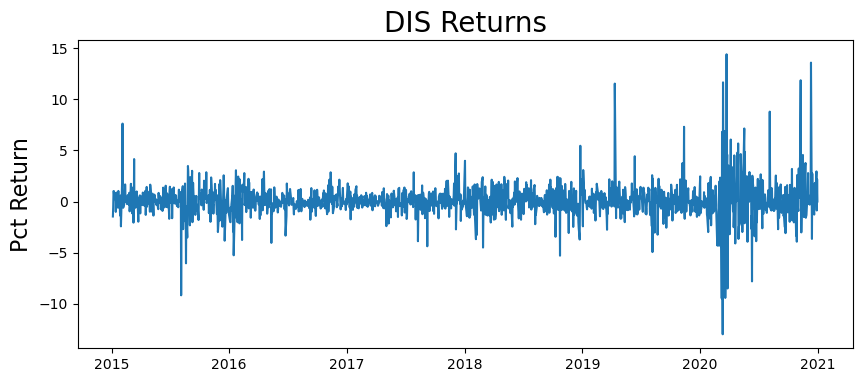

In [22]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('DIS Returns', fontsize=20)

## PACF

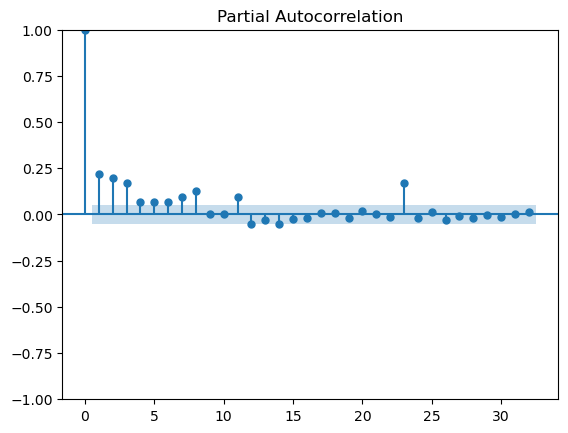

In [23]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(3,3)

In [24]:
model = arch_model(returns, p=3, q=3)

In [25]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 7471.914980683272
Iteration:      2,   Func. Count:     24,   Neg. LLF: 348992259692.2462
Iteration:      3,   Func. Count:     36,   Neg. LLF: 3630.1676308190313
Iteration:      4,   Func. Count:     47,   Neg. LLF: 3240.465045490867
Iteration:      5,   Func. Count:     58,   Neg. LLF: 2779.379644296003
Iteration:      6,   Func. Count:     68,   Neg. LLF: 2726.0563781607325
Iteration:      7,   Func. Count:     78,   Neg. LLF: 2686.4232496209006
Iteration:      8,   Func. Count:     88,   Neg. LLF: 2700.614726223398
Iteration:      9,   Func. Count:     98,   Neg. LLF: 2707.7996764944646
Iteration:     10,   Func. Count:    108,   Neg. LLF: 2682.4650165472044
Iteration:     11,   Func. Count:    118,   Neg. LLF: 2681.9771713712967
Iteration:     12,   Func. Count:    128,   Neg. LLF: 2679.9241347299576
Iteration:     13,   Func. Count:    137,   Neg. LLF: 2680.012142975489
Iteration:     14,   Func. Count:    147,   Neg. LLF: 267

In [26]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2679.62
Distribution:                  Normal   AIC:                           5375.25
Method:            Maximum Likelihood   BIC:                           5417.81
                                        No. Observations:                 1510
Date:                Fri, Apr 19 2024   Df Residuals:                     1509
Time:                        23:28:38   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0143  4.015e-02      0.356      0.722 [-6.441e-02,9.297e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.1281      0.108      1.185      0.236   [-8.386e-02,  0.340]
alpha[1]       0.0293  2.453e-02      1.196      0.232 [-1.873e-02,7.741e-02]
alpha[2]       0.0817      0.112      0.727      0.468      [ -0.139,  0.302]
alpha[3]       0.1228      0.143      0.859      0.390      [ -0.157,  0.403]
beta[1]    1.2185e-14      0.131  9.328e-14      1.000      [ -0.256,  0.256]
beta[2]        0.0321      0.166      0.194      0.846      [ -0.293,  0.357]
beta[3]        0.7136      0.118      6.027  1.672e-09      [  0.482,  0.946]
=============================================================================

Covariance estimator: robust
"""

## Try GARCH(3,0) = ARCH(3)

In [27]:
model = arch_model(returns, p=3, q=0)

In [28]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 5203.617986821836
Iteration:      2,   Func. Count:     16,   Neg. LLF: 7485.566215611234
Iteration:      3,   Func. Count:     25,   Neg. LLF: 686868.8825927702
Iteration:      4,   Func. Count:     32,   Neg. LLF: 531889.8948760034
Iteration:      5,   Func. Count:     39,   Neg. LLF: 27850.006238754722
Iteration:      6,   Func. Count:     46,   Neg. LLF: 2751.065297094575
Iteration:      7,   Func. Count:     53,   Neg. LLF: 2807.3915309573504
Iteration:      8,   Func. Count:     61,   Neg. LLF: 2744.4353082275084
Iteration:      9,   Func. Count:     68,   Neg. LLF: 2733.016869237623
Iteration:     10,   Func. Count:     74,   Neg. LLF: 2732.890078315588
Iteration:     11,   Func. Count:     80,   Neg. LLF: 2732.8730687477964
Iteration:     12,   Func. Count:     86,   Neg. LLF: 2732.866675580941
Iteration:     13,   Func. Count:     92,   Neg. LLF: 2732.864721070756
Iteration:     14,   Func. Count:     98,   Neg. LLF: 2732.8

In [29]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2732.86
Distribution:                  Normal   AIC:                           5475.73
Method:            Maximum Likelihood   BIC:                           5502.33
                                        No. Observations:                 1510
Date:                Fri, Apr 19 2024   Df Residuals:                     1509
Time:                        23:28:47   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0164  4.643e-02      0.354      0.723 [-7.456e-02,  0.107]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          1.2849      0.339      3.789  1.512e-04      [  0.620,  1.950]
alpha[1]       0.0368  2.406e-02      1.528      0.127 [-1.039e-02,8.391e-02]
alpha[2]       0.3191      0.131      2.441  1.463e-02    [6.292e-02,  0.575]
alpha[3]       0.2695      0.161      1.673  9.431e-02   [-4.622e-02,  0.585]
=============================================================================

Covariance estimator: robust
"""

In [30]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [31]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

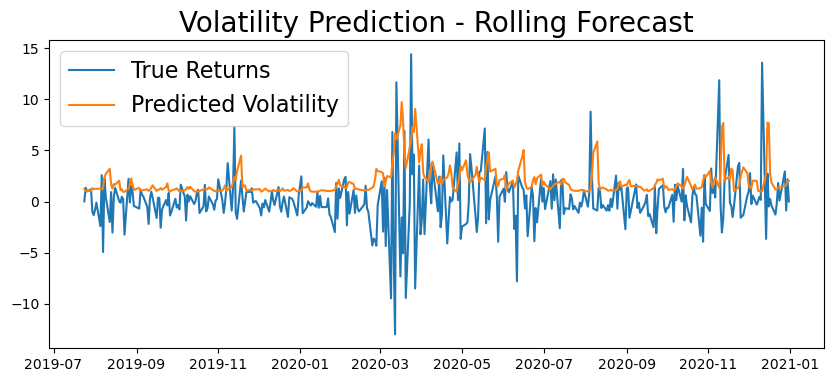

In [32]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# S&P 500

In [ ]:
start = datetime(2000, 1, 1)
end = datetime(2020, 6, 10)

In [ ]:
spy = web.DataReader('SPY', 'yahoo', start=start, end=end)

In [ ]:
returns = 100 * spy.Close.pct_change().dropna()

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

## PACF

In [ ]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(2,2)

In [ ]:
model = arch_model(returns, p=2, q=2)

In [ ]:
model_fit = model.fit()

In [ ]:
model_fit.summary()

## Rolling Forecast

In [ ]:
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [ ]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])

In [ ]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# How to use the model

In [ ]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [ ]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)